In [26]:
# Visualize COCO JSON

# from pycocotools.coco import COCO
# import matplotlib.pyplot as plt
# import skimage.io as io
# import random
# import os
# import matplotlib.patches as patches

from PIL import Image, ImageDraw, ImageFont
from pycocotools.coco import COCO
import os

# Set the project directory path manually
project_dir = "/Users/caraappel/Documents/CV4E/"

# Set working directory to the project folder level
os.chdir(project_dir)

print(os.getcwd())

# Path to your COCO JSON file
#coco_json_path = "oregon_critters/metadata_labels/dataset_300_split.json"
coco_json_path = "oregon_critters/metadata_labels/dataset_300_split_adjXY.json"
#coco_json_path = "oregon_critters/metadata_labels/dataset_300_split_finalBB.json"

# Initialize COCO object
coco = COCO(coco_json_path)

/Users/caraappel/Documents/CV4E
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [28]:
# Visualization function
def visualize_annotations(image_id):
    image_info = coco.loadImgs(image_id)[0]
    image_path = "/Users/caraappel/Documents/CV4E/" + image_info['file_name']  # Replace with actual path
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    print(image_path)

    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)
    
    for ann in annotations:
        bbox = ann['bbox']
        x, y, width, height = bbox[0], bbox[1], bbox[2], bbox[3]
        x1, y1 = x, y
        x2, y2 = x + width, y + height
        draw.rectangle([x1, y1, x2, y2], outline='green', width=2)
        class_id = ann['category_id']
        class_name = coco.loadCats(class_id)[0]['name']
        text = f"{class_name}"
        font = ImageFont.load_default()  # You can adjust font style and size here
        draw.text((x1, y1 - 20), text, fill='green', font=font)

    image.show()

In [33]:
# Visualize annotations for a specific image
image_id_to_visualize = 109  # Replace with the image ID you want to visualize
visualize_annotations(image_id_to_visualize)

print(image_id_to_visualize)

#Display a random image with annotations
#image_ids = coco.getImgIds()
#random_image_id = random.choice(image_ids)

/Users/caraappel/Documents/CV4E/data/DUNES/hailey.hester-DUNES_Marten/images/PICT0158.JPG
109


In [27]:
#Display a random image with annotations
image_ids = coco.getImgIds()
random_image_id = random.choice(image_ids)
image_info = coco.loadImgs([random_image_id])[0]
image_path = image_info['file_name']
image = io.imread(image_path)
plt.imshow(image)
plt.axis('off')

NameError: name 'random' is not defined

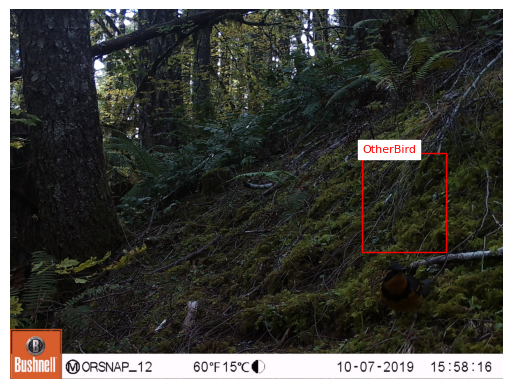

In [113]:
# Get image information
image_ids = coco.getImgIds()
random_image_id = random.choice(image_ids)
image_info = coco.loadImgs([random_image_id])[0]
image_path = image_info['file_name']
image = io.imread(image_path)

# Load annotations for the selected image
ann_ids = coco.getAnnIds(imgIds=[random_image_id])
annotations = coco.loadAnns(ann_ids)

# Visualize the image
plt.imshow(image)
plt.axis('off')

# Adjust and visualize the annotations with bottom-left origin
for ann in annotations:
    x, y, width, height = ann['bbox']
    x_bottomleft = x  
    y_bottomleft = y 
    class_id = ann['category_id']
    class_name = coco.loadCats([class_id])[0]['name']
    bbox_rect = patches.Rectangle(
        (x_bottomleft, y_bottomleft), width, height,
        linewidth=1, edgecolor='r', facecolor='none'
    )
    plt.gca().add_patch(bbox_rect)
    plt.text(
        x_bottomleft, y_bottomleft - 2, class_name,
        color='red', backgroundcolor='white', fontsize=8
    )

plt.show()